In [87]:
# O módulo LocalOutlierFactor da biblioteca scikit-learn é usado para detectar outliers em um conjunto de dados
from sklearn.neighbors import LocalOutlierFactor
# O módulo KBinsDiscretizer da biblioteca scikit-learn é usado para discretizar 
# variáveis contínuas em bins (intervalos) de valores discretos
from sklearn.preprocessing import KBinsDiscretizer

#analise
from scipy.stats import shapiro
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import kendalltau

#data
import numpy as np
import pandas as pd

#visualização
import seaborn as sns
import matplotlib.pyplot as plt

#aux
import os

# essas duas linhas são usadas para definir como os números de ponto flutuante 
# serão formatados ao serem exibidos em numpy e pandas, garantindo que eles sejam 
# exibidos com uma precisão específica e sem notação científica.'''
np.set_printoptions(suppress=True, formatter={'float_kind':'{:16.3f}'.format}, linewidth=130)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# exploração de dados da amostra de parâmetros a, b e c dos itens

- **nu_param_a**: Parâmetro de discriminação: é o poder de discriminação do item para diferenciar os participantes que dominam dos participantes que não dominam a habilidade avaliada.
- **nu_param_b**: Parâmetro de dificuldade: associado à dificuldade do item, sendo que quanto maior seu valor, mais difícil é o item.
- **nu_param_c**: Parâmetro de acerto ao acaso: é a probabilidade de um participante acertar o item não dominando a habilidade exigida.

## carregar os dados

In [1]:
file = os.path.join('data', 'df_itens_geral_validos.csv')
df_itens = pd.read_csv(file, sep = ';', encoding = 'UTF-8')

NameError: name 'os' is not defined

In [3]:
df_itens.shape #1922 itens

(1922, 28)

In [4]:
df_itens.head()

,co_posicao,sg_area,co_item,tx_gabarito,co_habilidade,in_item_aban,tx_motivo_aban,nu_param_a,nu_param_b,nu_param_c,...,texto_questao,texto_base,alternativa_a,alternativa_b,alternativa_c,alternativa_d,alternativa_e,tp_lingua,in_item_adaptado,tp_versao_digital
0,1,CH,71933,A,6.00000,0,NaN,2.23777,1.04258,0.29804,...,O gráfico representa a relação entre o tamanho...,O gráfico representa a relação entre o tamanh...,A concentraçao de terras nas mãos de poucos.,A existência de poucas terras agricultáveis.,O domínio territorial dos minifúndios.,A primazia da agricultura familiar.,A debilidade dos plantations modernos.,NaN,NaN,NaN
1,2,CH,71990,B,19.00000,0,NaN,1.35599,1.23358,0.23895,...,"Antes, eram apenas as grandes cidades que se a...","Antes, eram apenas as grandes cidades que se a...",a redução do processo de concentração de terras.,o aumento do aproveitamento de solos menos fé...,a ampliação do isolamento do espaço rural.,a estagnação da fronteira agrícola do país.,a diminuição do nível de emprego formal.,NaN,NaN,NaN
2,3,CH,73431,A,17.00000,0,NaN,1.58426,1.26006,0.19016,...,A maioria das pessoas daqui era do campo. Vila...,A maioria das pessoas daqui era do campo. Vila...,dos impactos sociais da modernização da agric...,da recomposição dos salários do trabalhador r...,da exigência de qualificação do trabalhador r...,da diminuição da importância da agricultura.,dos processos de desvalorização de áreas rurais.,NaN,NaN,NaN
3,4,CH,58249,B,26.00000,0,NaN,1.87124,-0.40493,0.17401,...,Os lixões são o pior tipo de disposição final ...,Os lixões são o pior tipo de disposição final ...,"causam problemas respiratórios, devido ao mau...",são locais propícios à proliferação de vetore...,"provocam o fenômeno da chuva ácida, devido ao...",são instalados próximos ao centro das cidades...,são responsáveis pelo desaparecimento das nas...,NaN,NaN,NaN
4,5,CH,73854,D,27.00000,0,NaN,0.40830,1.46209,0.02447,...,O esquema representa um processo de erosão em ...,O esquema representa um processo de erosão em...,Plantio direto.,Associação de culturas.,Implantação de curvas de nível.,"Aração do solo, do topo ao vale.",Terraceamento na propriedade,NaN,NaN,NaN


In [5]:
data = df_itens

In [6]:
data.isnull().sum()

co_posicao              0
sg_area                 0
co_item                 0
tx_gabarito             0
co_habilidade          12
in_item_aban            0
tx_motivo_aban       1922
nu_param_a              0
nu_param_b              0
nu_param_c              0
tx_cor                  0
co_prova                0
id                      0
ano                     0
cor                     0
meio_aplicacao          0
num_questao             0
area                  405
texto_questao           0
texto_base            266
alternativa_a         308
alternativa_b         114
alternativa_c         116
alternativa_d         112
alternativa_e          97
tp_lingua            1920
in_item_adaptado      722
tp_versao_digital    1517
dtype: int64

In [10]:
# data contem totas as linhas com o texto da questão 
data = data.loc[:, ['texto_questao', 'nu_param_a', 'nu_param_b', 'nu_param_c']]

In [81]:
data.describe()

,nu_param_a,nu_param_b,nu_param_c
count,1922.00000,1922.00000,1922.00000
mean,2.19187,1.31213,0.16447
std,0.89697,1.09993,0.06572
min,0.05808,-1.26778,0.00161
25%,1.58148,0.65202,0.12487
50%,2.09211,1.22433,0.16500
75%,2.73482,1.83686,0.20316
max,8.78435,17.62443,0.50000


In [11]:
data.head()

,texto_questao,nu_param_a,nu_param_b,nu_param_c
0,O gráfico representa a relação entre o tamanho...,2.23777,1.04258,0.29804
1,"Antes, eram apenas as grandes cidades que se a...",1.35599,1.23358,0.23895
2,A maioria das pessoas daqui era do campo. Vila...,1.58426,1.26006,0.19016
3,Os lixões são o pior tipo de disposição final ...,1.87124,-0.40493,0.17401
4,O esquema representa um processo de erosão em ...,0.40830,1.46209,0.02447


In [12]:
data.describe()

,nu_param_a,nu_param_b,nu_param_c
count,1922.00000,1922.00000,1922.00000
mean,2.19187,1.31213,0.16447
std,0.89697,1.09993,0.06572
min,0.05808,-1.26778,0.00161
25%,1.58148,0.65202,0.12487
50%,2.09211,1.22433,0.16500
75%,2.73482,1.83686,0.20316
max,8.78435,17.62443,0.50000


In [14]:
data.isnull().sum()

texto_questao    0
nu_param_a       0
nu_param_b       0
nu_param_c       0
dtype: int64

## teste de normalidade

### sem remoção de outliers

- **parametro a**

<AxesSubplot:xlabel='nu_param_a', ylabel='Density'>

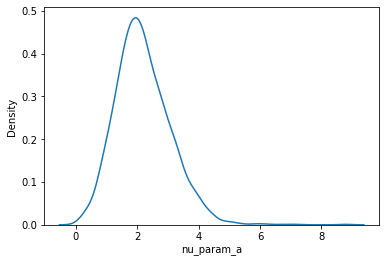

In [13]:
# distribuição estatística da coluna do parâmetro a
sns.kdeplot(data=data, x="nu_param_a")

O teste de Shapiro é um teste estatístico utilizado para verificar se uma amostra de dados segue uma distribuição normal. A hipótese nula e a hipótese alternativa desse teste são:

Hipótese nula (H0): A amostra segue uma distribuição normal.
Hipótese alternativa (H1): A amostra não segue uma distribuição normal.
Ou seja, a hipótese nula assume que os dados foram retirados de uma população com uma distribuição normal e a hipótese alternativa assume que os dados não seguiram uma distribuição normal.

O resultado do teste de Shapiro fornece um valor-p que indica a probabilidade de se obter uma amostra com a mesma estatística de teste (estatística W) sob a hipótese nula. Se o valor-p for menor do que um determinado nível de significância pré-definido (por exemplo, 0,05), então a hipótese nula é rejeitada, o que significa que não se pode afirmar com 95% de confiança que a amostra segue uma distribuição normal. Caso contrário, se o valor-p for maior do que o nível de significância, então não há evidências suficientes para rejeitar a hipótese nula, o que significa que a amostra pode ser considerada como tendo uma distribuição normal.

In [20]:
# teste de normalidade de Shapiro-Wilk
stat, p = shapiro(data.nu_param_a.values)

# resultados do teste
print('Estatística do teste: ', stat)
print('Valor p: ', p)
if p > 0.05:
    print('Distribuição é normal')
else:
    print('Distribuição não é normal')

Estatística do teste:  0.9691320657730103
Valor p:  6.952752901480248e-20
Distribuição não é normal


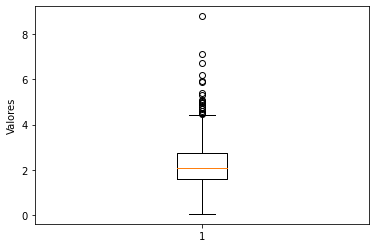

In [16]:
# boxplot dos dados
fig, ax = plt.subplots()
ax.boxplot(data.nu_param_a.values)

# Configurar eixo y
ax.set_ylabel('Valores')

# Mostrar gráfico
plt.show()

- **parametro b**

<AxesSubplot:xlabel='nu_param_b', ylabel='Density'>

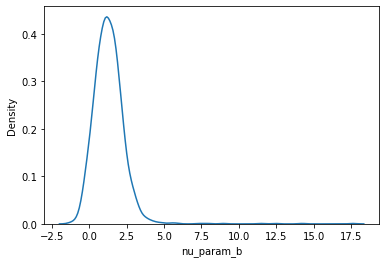

In [15]:
# distribuição estatística da coluna do parâmetro b
sns.kdeplot(data=data, x="nu_param_b")

In [21]:
# teste de normalidade de Shapiro-Wilk
stat, p = shapiro(data.nu_param_b.values)

# resultados do teste
print('Estatística do teste: ', stat)
print('Valor p: ', p)
if p > 0.05:
    print('Distribuição é normal')
else:
    print('Distribuição não é normal')

Estatística do teste:  0.7948774695396423
Valor p:  5.324934164434305e-44
Distribuição não é normal


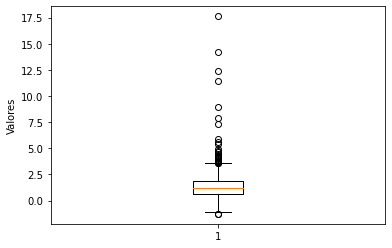

In [17]:
# boxplot dos dados
fig, ax = plt.subplots()
ax.boxplot(data.nu_param_b.values)

# Configurar eixo y
ax.set_ylabel('Valores')

# Mostrar gráfico
plt.show()

- **parametro c**

<AxesSubplot:xlabel='nu_param_c', ylabel='Density'>

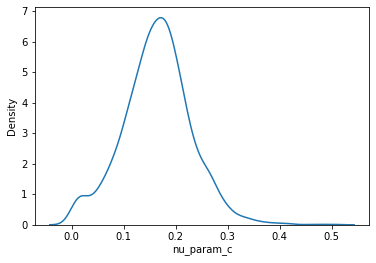

In [16]:
# distribuição estatística da coluna do parâmetro c
sns.kdeplot(data=data, x="nu_param_c")

In [22]:
# teste de normalidade de Shapiro-Wilk
stat, p = shapiro(data.nu_param_c.values)

# resultados do teste
print('Estatística do teste: ', stat)
print('Valor p: ', p)
if p > 0.05:
    print('Distribuição é normal')
else:
    print('Distribuição não é normal')

Estatística do teste:  0.9893860816955566
Valor p:  1.1384914538892232e-10
Distribuição não é normal


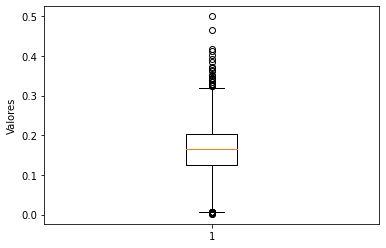

In [18]:
# boxplot dos dados
fig, ax = plt.subplots()
ax.boxplot(data.nu_param_c.values)

# Configurar eixo y
ax.set_ylabel('Valores')

# Mostrar gráfico
plt.show()

- conclui-se que as distribuições estatísticas da amostra de parâmetros a, b e c não são normais.

### com remoção de outliers

O Local Outlier Factor (LOF) é um algoritmo de detecção de outliers que utiliza a relação de densidade entre pontos para identificar pontos anômalos em um conjunto de dados. Em vez de agrupar pontos juntos como o DBSCAN, o LOF avalia a relação de densidade de cada ponto com seus vizinhos mais próximos e atribui a cada ponto uma pontuação de anomalia. Os pontos com pontuações mais altas são considerados outliers.

A vantagem do LOF em relação a outros algoritmos de detecção de outliers é que ele é capaz de detectar outliers em formas complexas e não lineares, além de ser robusto a ruído e variações na densidade dos dados. No entanto, o LOF também pode ser computacionalmente intensivo, especialmente em grandes conjuntos de dados.

O Local Outlier Factor (LOF), usa a relação de densidade para avaliar se um ponto é anômalo ou não. Um ponto é considerado anômalo se sua relação de densidade com seus vizinhos é significativamente menor ou maior do que a relação de densidade dos vizinhos. Em outras palavras, se um ponto estiver em uma região muito menos densa ou muito mais densa do que a região circundante, ele é considerado um outlier.

LocalOutlierFactor(n_neighbors=10) cria uma instância da classe LocalOutlierFactor do pacote sklearn.neighbors e define o parâmetro n_neighbors como 10. O parâmetro n_neighbors é o número de vizinhos considerados pelo algoritmo para determinar a densidade local de cada ponto no conjunto de dados.

In [41]:
lof = LocalOutlierFactor(n_neighbors=20)

- **parâmetro a**

In [42]:
valores = data.nu_param_a.values.reshape(data.shape[0], 1)
# aplicar o algoritmo LOF
anomalies = lof.fit_predict(valores)

# obter as pontuações de anomalia para cada ponto
scores = lof.negative_outlier_factor_

# um dataframe para visualizar os dados e as pontuações de anomalia
df = pd.DataFrame(valores, columns=['valores'])
df['anomalies'] = anomalies
df['scores'] = scores

# imprimir outliers
outliers = df[df['anomalies'] == -1]
print("Outliers:")
outliers.sort_values('valores', ascending = False)

Outliers:


,valores,anomalies,scores
1662,8.78435,-1,-8.05599
1199,7.09582,-1,-4.98255
1047,6.73355,-1,-4.41359
982,6.20439,-1,-3.68028
1263,5.93339,-1,-3.23971
1663,5.86603,-1,-3.13066
1695,5.39524,-1,-2.56680
1346,5.31206,-1,-2.51009
1537,5.09946,-1,-2.23053
548,5.05216,-1,-2.13530


In [43]:
data_1 = data[~data.index.isin(df[df['anomalies'] == -1].index)].reset_index(drop = True)

In [44]:
data_1.shape

(1904, 4)

In [45]:
params_a_sem_outliers = data_1.nu_param_a.values
params_a_sem_outliers

array([           2.238,            1.356,            1.584, ...,            3.018,            3.249,            1.416])

<AxesSubplot:ylabel='Density'>

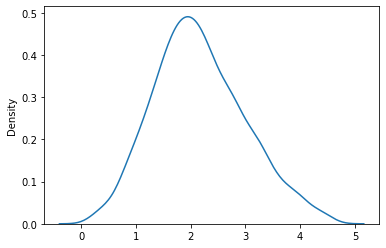

In [46]:
# distribuição estatística da coluna do parâmetro b
sns.kdeplot(x=params_a_sem_outliers)

In [47]:
# teste de normalidade de Shapiro-Wilk
stat, p = shapiro(params_a_sem_outliers)

# resultados do teste
print('Estatística do teste: ', stat)
print('Valor p: ', p)
if p > 0.05:
    print('Distribuição é normal')
else:
    print('Distribuição não é normal')

Estatística do teste:  0.9896274209022522
Valor p:  1.9366083736649387e-10
Distribuição não é normal


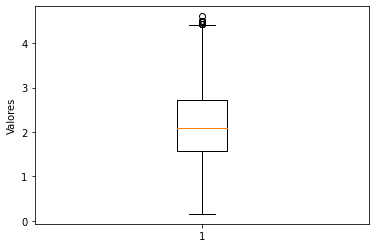

In [48]:
# boxplot dos dados
fig, ax = plt.subplots()
ax.boxplot(params_a_sem_outliers)

# Configurar eixo y
ax.set_ylabel('Valores')

# Mostrar gráfico
plt.show()

- **parâmetro b**

In [49]:
valores = data.nu_param_b.values.reshape(data.shape[0], 1)
# aplicar o algoritmo LOF
anomalies = lof.fit_predict(valores)

# obter as pontuações de anomalia para cada ponto
scores = lof.negative_outlier_factor_

# criar um dataframe para visualizar os dados e as pontuações de anomalia
df = pd.DataFrame(valores, columns=['valores'])
df['anomalies'] = anomalies
df['scores'] = scores

# imprimir outliers
outliers = df[df['anomalies'] == -1]
print("Outliers:")
outliers.sort_values('valores', ascending = False)

Outliers:


,valores,anomalies,scores
455,17.62443,-1,-11.61103
478,14.23385,-1,-8.94789
1299,12.41660,-1,-7.60431
642,11.43966,-1,-6.91456
1272,8.96186,-1,-5.66721
1011,7.92092,-1,-4.86909
444,7.32950,-1,-4.37146
187,5.86198,-1,-2.91869
628,5.61338,-1,-2.69392
1448,5.45136,-1,-2.53781


In [50]:
data_2 = data[~data.index.isin(df[df['anomalies'] == -1].index)].reset_index(drop = True)

In [51]:
data_2.shape

(1887, 4)

In [52]:
params_b_sem_outliers = data_2.nu_param_b.values
params_b_sem_outliers

array([           1.043,            1.234,            1.260, ...,            1.657,            1.218,            0.309])

<AxesSubplot:ylabel='Density'>

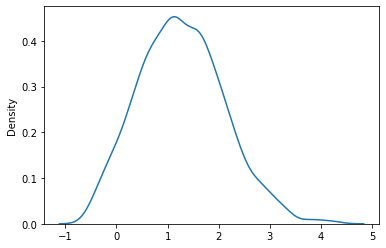

In [53]:
# distribuição estatística da coluna do parâmetro b
sns.kdeplot(x=params_b_sem_outliers)

In [64]:
# teste de normalidade de Shapiro-Wilk
stat, p = shapiro(params_b_sem_outliers)

# resultados do teste
print('Estatística do teste: ', stat)
print('Valor p: ', p)
if p > 0.05:
    print('Distribuição é normal')
else:
    print('Distribuição não é normal')

Estatística do teste:  0.9915659427642822
Valor p:  5.6119220381845025e-09
Distribuição não é normal


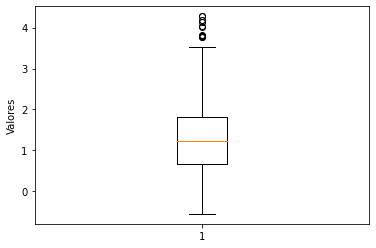

In [54]:
# boxplot dos dados
fig, ax = plt.subplots()
ax.boxplot(params_b_sem_outliers)

# Configurar eixo y
ax.set_ylabel('Valores')

# Mostrar gráfico
plt.show()

- **parâmetro c**

In [55]:
valores = data.nu_param_c.values.reshape(data.shape[0], 1)
# aplicar o algoritmo LOF
anomalies = lof.fit_predict(valores)

# obter as pontuações de anomalia para cada ponto
scores = lof.negative_outlier_factor_

# criar um dataframe para visualizar os dados e as pontuações de anomalia
df = pd.DataFrame(valores, columns=['valores'])
df['anomalies'] = anomalies
df['scores'] = scores

# imprimir outliers
outliers = df[df['anomalies'] == -1]
print("Outliers:")
outliers.sort_values('valores', ascending = False)

Outliers:


,valores,anomalies,scores
684,0.50000,-1,-4.05685
1652,0.46479,-1,-3.22506
621,0.41758,-1,-2.26188
680,0.41167,-1,-2.16503
83,0.40145,-1,-1.97488
698,0.39136,-1,-1.79757
950,0.38411,-1,-1.66331


In [59]:
data_3 = data[~data.index.isin(df[df['anomalies'] == -1].index)].reset_index(drop = True)

In [60]:
data_3.shape

(1915, 4)

In [61]:
params_c_sem_outliers = data_3.nu_param_c.values
params_c_sem_outliers

array([           0.298,            0.239,            0.190, ...,            0.153,            0.094,            0.079])

<AxesSubplot:ylabel='Density'>

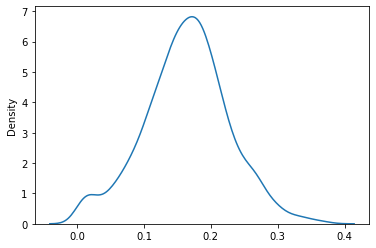

In [62]:
# distribuição estatística da coluna do parâmetro b
sns.kdeplot(x=params_c_sem_outliers)

In [65]:
# teste de normalidade de Shapiro-Wilk
stat, p = shapiro(params_c_sem_outliers)

# resultados do teste
print('Estatística do teste: ', stat)
print('Valor p: ', p)
if p > 0.05:
    print('Distribuição é normal')
else:
    print('Distribuição não é normal')

Estatística do teste:  0.9942623972892761
Valor p:  9.217797014571261e-07
Distribuição não é normal


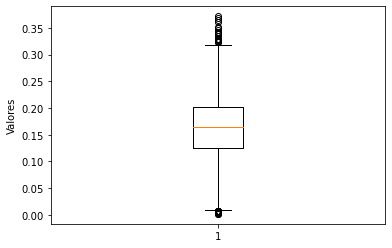

In [63]:
# boxplot dos dados
fig, ax = plt.subplots()
ax.boxplot(params_c_sem_outliers)

# Configurar eixo y
ax.set_ylabel('Valores')

# Mostrar gráfico
plt.show()

- mesmo com a remoção de outliers a distribuições resultantes continuam a não serem distribuições normais

## correlação

- como o teste de Shapiro mostrou que as amostras de parâmetros não possuem distribuição normal escolhe-se os testes de correlação não parâmetricos correlação de Spearman ou Kendall.

### entre os parâmetros a e b

#### spearman

A hipótese nula foi rejeitada. Há correlação entre as variáveis p-value: 0.010504262208904611 correlação: -0.0583535480227736


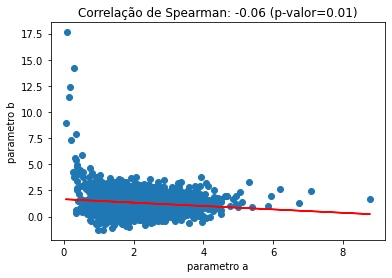

In [72]:
# linha de regressão linear
regressao = np.polyfit(data.nu_param_a, data.nu_param_b, 1)

# correlação de Spearman
corr, p_value = spearmanr(data.nu_param_a, data.nu_param_b)

#se p menor que 0.05 o erro é menor se a hipótese nula for rejeitada
if p_value < 0.05:
    print("A hipótese nula foi rejeitada. Há correlação entre as variáveis", 'p-value:', p_value, 'correlação:', corr)
else:
    print("A hipótese nula não foi rejeitada. Não há correlação entre as variáveis.", 'p-value:', p_value, 'correlação:', corr)

# plotar a correlação de Spearman
plt.scatter(data.nu_param_a, data.nu_param_b)
plt.plot(data.nu_param_a, regressao[0]*data.nu_param_a + regressao[1], color='red')
plt.title(f'Correlação de Spearman: {corr:.2f} (p-valor={p_value:.2f})')
plt.xlabel('parametro a')
plt.ylabel('parametro b')
plt.show()

#### kendall

A hipótese nula foi rejeitada. Há correlação entre as variáveis p-value: 0.009514829067909467 correlação: -0.03946655312818224


Text(0, 0.5, 'parametro b')

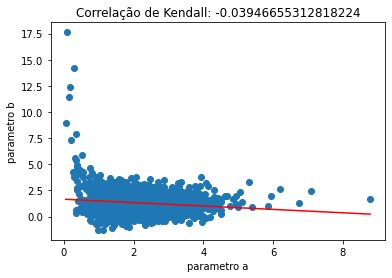

In [86]:
# Calculando a correlação de Kendall
corr, p_value = kendalltau(data.nu_param_a, data.nu_param_b)

#se p menor que 0.05 o erro é menor se a hipótese nula for rejeitada
if p_value < 0.05:
    print("A hipótese nula foi rejeitada. Há correlação entre as variáveis", 'p-value:', p_value, 'correlação:', corr)
else:
    print("A hipótese nula não foi rejeitada. Não há correlação entre as variáveis.", 'p-value:', p_value, 'correlação:', corr)

# Plotando o gráfico de dispersão e a reta de regressão
plt.scatter(data.nu_param_a, data.nu_param_b)
plt.plot(np.unique(data.nu_param_a), np.poly1d(np.polyfit(data.nu_param_a, data.nu_param_b, 1))(np.unique(data.nu_param_a)), color='red')
plt.title('Correlação de Kendall: ' + str(corr))
plt.xlabel('parametro a')
plt.ylabel('parametro b')

- há uma correlação ligeiramente negativa entre os parâmetros a e b, ou seja, entre os parâmetros de discriminação e dificuldade. Isso significa que quando maior a discriminação menor a dificuldade do item, mas como os valores de correlação negativa foram baixos pode ser que essa correlação seja insignificante.

### entre os parâmetros a e c

#### spearman

A hipótese nula foi rejeitada. Há correlação entre as variáveis p-value: 0.013246560062470948 correlação: 0.05649335602462241


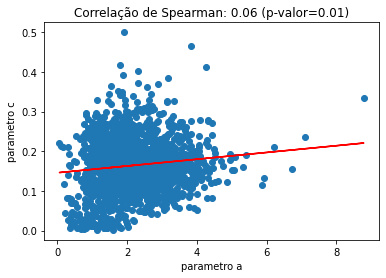

In [75]:
# Ajustar uma linha de regressão linear
regressao = np.polyfit(data.nu_param_a, data.nu_param_c, 1)

#realizar a correlação de spearman entre as similaridades
# calcular a correlação de Spearman
corr, p_value = spearmanr(data.nu_param_a, data.nu_param_c)

#se p menor que 0.05 o erro é menor se a hipótese nula for rejeitada
if p_value < 0.05:
    print("A hipótese nula foi rejeitada. Há correlação entre as variáveis", 'p-value:', p_value, 'correlação:', corr)
else:
    print("A hipótese nula não foi rejeitada. Não há correlação entre as variáveis.", 'p-value:', p_value, 'correlação:', corr)

# plotar a correlação de Spearman
plt.scatter(data.nu_param_a, data.nu_param_c)
plt.plot(data.nu_param_a, regressao[0]*data.nu_param_a + regressao[1], color='red')
plt.title(f'Correlação de Spearman: {corr:.2f} (p-valor={p_value:.2f})')
plt.xlabel('parametro a')
plt.ylabel('parametro c')
plt.show()

#### kendall

A hipótese nula foi rejeitada. Há correlação entre as variáveis p-value: 0.017753288184460574 correlação: 0.03608530290980029


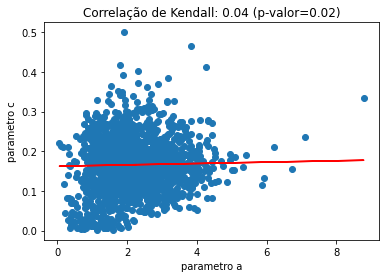

In [90]:
# calcular a correlação de kendall e o p-valor
corr, p_value = kendalltau(data.nu_param_a, data.nu_param_c)

#se p menor que 0.05 o erro é menor se a hipótese nula for rejeitada
if p_value < 0.05:
    print("A hipótese nula foi rejeitada. Há correlação entre as variáveis", 'p-value:', p_value, 'correlação:', corr)
else:
    print("A hipótese nula não foi rejeitada. Não há correlação entre as variáveis.", 'p-value:', p_value, 'correlação:', corr)

# plotar os dados e a reta de correlação
plt.scatter(data.nu_param_a, data.nu_param_c)
plt.plot(data.nu_param_a, regressao[0]*data.nu_param_a + regressao[1], color='red')
plt.xlabel('parametro a')
plt.ylabel('parametro c')
plt.title(f'Correlação de Kendall: {corr:.2f} (p-valor={p_value:.2f})')
plt.show()

- a correlação entre os parâmetros a e c é ligeiramente positiva. Uma correlação positiva entre o parâmetro de discriminação e o parâmetro de acerto ao acaso indicaria que os itens que são mais discriminativos (ou seja, que diferenciam melhor os respondentes mais habilidosos dos menos habilidosos) também são aqueles que têm uma maior probabilidade de serem acertados ao acaso por respondentes menos habilidosos. É importante destacar que a correlação positiva é baixa 0.06 (spearman) e 0.04 (Kendall).

### entre os parâmetros b e c

#### spearman

A hipótese nula não foi rejeitada. Não há correlação entre as variáveis. p-value: 0.6559491211890041 correlação: -0.010168456043067087


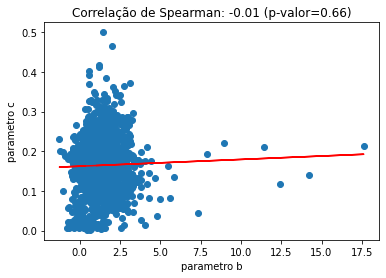

In [78]:
# Ajustar uma linha de regressão linear
regressao = np.polyfit(data.nu_param_b, data.nu_param_c, 1)

#realizar a correlação de spearman entre as similaridades
# calcular a correlação de Spearman
corr, p_value = spearmanr(data.nu_param_b, data.nu_param_c)

#se p menor que 0.05 o erro é menor se a hipótese nula for rejeitada
if p_value < 0.05:
    print("A hipótese nula foi rejeitada. Há correlação entre as variáveis", 'p-value:', p_value, 'correlação:', corr)
else:
    print("A hipótese nula não foi rejeitada. Não há correlação entre as variáveis.", 'p-value:', p_value, 'correlação:', corr)

# plotar a correlação de Spearman
plt.scatter(data.nu_param_b, data.nu_param_c)
plt.plot(data.nu_param_b, regressao[0]*data.nu_param_b + regressao[1], color='red')
plt.title(f'Correlação de Spearman: {corr:.2f} (p-valor={p_value:.2f})')
plt.xlabel('parametro b')
plt.ylabel('parametro c')
plt.show()

#### kendall

A hipótese nula não foi rejeitada. Não há correlação entre as variáveis. p-value: 0.602048127742811 correlação: -0.007937206584670405


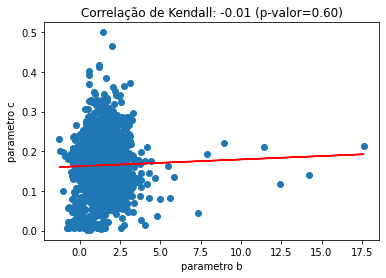

In [91]:
#realizar a correlação de spearman entre as similaridades
# calcular a correlação de Spearman
corr, p_value = kendalltau(data.nu_param_b, data.nu_param_c)

#se p menor que 0.05 o erro é menor se a hipótese nula for rejeitada
if p_value < 0.05:
    print("A hipótese nula foi rejeitada. Há correlação entre as variáveis", 'p-value:', p_value, 'correlação:', corr)
else:
    print("A hipótese nula não foi rejeitada. Não há correlação entre as variáveis.", 'p-value:', p_value, 'correlação:', corr)

# plotar a correlação de Spearman
plt.scatter(data.nu_param_b, data.nu_param_c)
plt.plot(data.nu_param_b, regressao[0]*data.nu_param_b + regressao[1], color='red')
plt.title(f'Correlação de Kendall: {corr:.2f} (p-valor={p_value:.2f})')
plt.xlabel('parametro b')
plt.ylabel('parametro c')
plt.show()

- não há correlação entre os parâmetros de dificuldade e de acerto ao acaso, ou seja, independente de o item ser difícil ou fácil isso não influencia o acerto ao acaso.

- considerando os valores baixos de correlação de spearman e kendall, pode-se afirmar que para a amostra dos 1922 itens os parâmetros não se correlacionam entre si. Isso indica que não há relação monotônica dos parêmetros entre si e que, em geral, mudanças em um parâmetro não são acompanhadas de mudanças consistentes em outro parâmetro. Se houvesse uma correlação muito forte entre as amostras de parâmetros bastaria treinar um modelo para um dos parâmetros, mas como não há essa correlação então o mais adequado é treinar um modelo para cada parâmetro.